In [2]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install opencv-python

In [3]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow-gpu
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'



  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\User\anaconda3\Lib\site-packages\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\User\anaconda3\Lib\site-packages\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\User\anaconda3\Lib\site-packages\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\User\anaconda3\Lib\site-packages\packaging\_parser.py", line 126, in _parse_requirement_details
      marke

In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-ty

In [11]:
import tensorflow as tf
import os

In [13]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [15]:
tf.config.list_physical_devices('GPU')

[]

In [23]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [25]:
from PIL import Image
import os

data_dir = 'dataset' 
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = Image.open(image_path)
            img.verify()  # Verifikasi bahwa gambar valid
            if img.format.lower() not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image dataset\test\mujahir
Issue with image dataset\test\red_devil
Issue with image dataset\test\sepat
Issue with image dataset\train\mujahir
Issue with image dataset\train\red_devil
Issue with image dataset\train\sepat
Issue with image dataset\valid\mujahir
Issue with image dataset\valid\red_devil
Issue with image dataset\valid\sepat


In [27]:
import numpy as np
from matplotlib import pyplot as plt

In [29]:
data = tf.keras.utils.image_dataset_from_directory('dataset')

Found 3063 files belonging to 3 classes.


In [31]:
data_iterator = data.as_numpy_iterator()

In [33]:
batch = data_iterator.next()

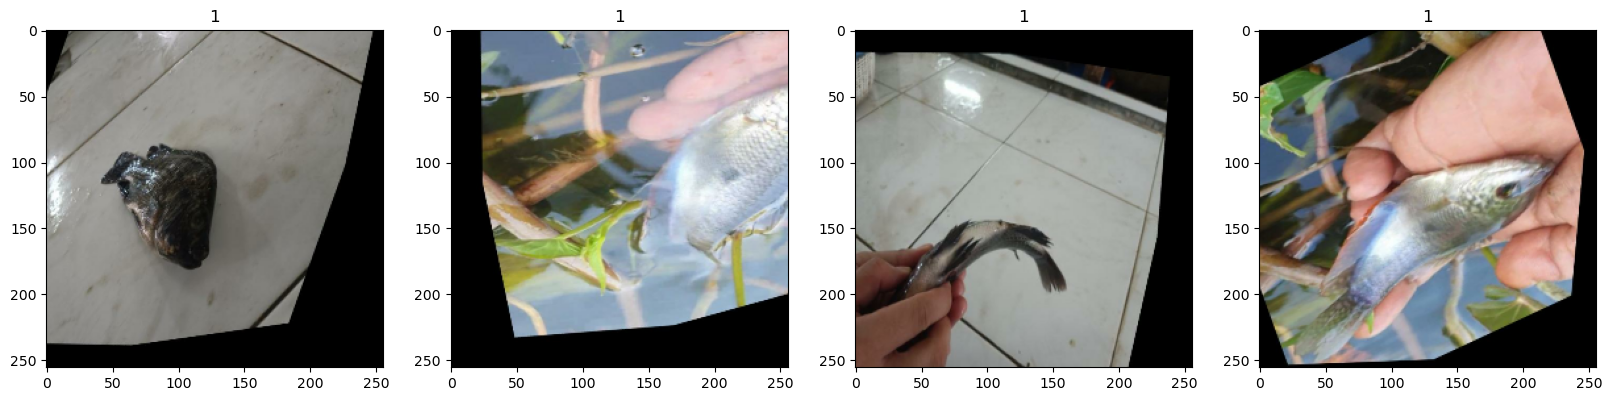

In [35]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [37]:
data = data.map(lambda x,y: (x/255, y))

In [39]:
data.as_numpy_iterator().next()

(array([[[[0.56740195, 0.5830882 , 0.57916665],
          [0.5647059 , 0.5803922 , 0.5764706 ],
          [0.5588235 , 0.5745098 , 0.57058823],
          ...,
          [0.4110294 , 0.43063724, 0.40710783],
          [0.40367648, 0.42328432, 0.3997549 ],
          [0.4237745 , 0.44338235, 0.41985294]],
 
         [[0.5656863 , 0.58137256, 0.577451  ],
          [0.5656863 , 0.58137256, 0.577451  ],
          [0.5637255 , 0.57941175, 0.5754902 ],
          ...,
          [0.44583333, 0.46544117, 0.44191176],
          [0.425     , 0.44460785, 0.42107844],
          [0.42156863, 0.44117647, 0.41764706]],
 
         [[0.5686275 , 0.58431375, 0.5803922 ],
          [0.57034314, 0.5860294 , 0.58210784],
          [0.5757353 , 0.59142154, 0.5875    ],
          ...,
          [0.4139706 , 0.43357843, 0.41004902],
          [0.41691175, 0.4365196 , 0.41299018],
          [0.42965686, 0.4492647 , 0.4257353 ]],
 
         ...,
 
         [[0.5009804 , 0.5205882 , 0.4970588 ],
          [0.50882

In [41]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [43]:
train_size

67

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [47]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [55]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Membuat model sequential
model = Sequential()

# Menggunakan Input layer
model.add(Input(shape=(256, 256, 3)))  # Lapisan input
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [59]:
logdir='logs'

In [61]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 44s 463ms/step - accuracy: 0.8630 - loss: -423.6698 - val_accuracy: 0.8914 - val_loss: -21964.8281
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 25s 373ms/step - accuracy: 0.8816 - loss: -176475.5156 - val_accuracy: 0.8980 - val_loss: -2627620.0000
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 386ms/step - accuracy: 0.8790 - loss: -7504005.0000 - val_accuracy: 0.8898 - val_loss: -48288020.0000
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 380ms/step - accuracy: 0.8740 - loss: -77957984.0000 - val_accuracy: 0.8947 - val_loss: -266318960.0000
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 378ms/step - accuracy: 0.8836 - loss: -397406080.0000 - val_accuracy: 0.9128 - val_loss: -1029934976.0000
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 385ms/step - accuracy: 0.8719 - loss: -1522165120.0000 - val_accuracy: 0.8964 - val_loss: -2522446592.0000
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 414ms/step - accuracy: 0.8804 - loss: -3390543104.0000 - val_accuracy: 0.9030 - val_loss: -7